# Laboratory exercise 5
> Håvard Godal, 245609

In [1]:
%load_ext autoreload
%autoreload 2

## Problem 1

In [2]:
import numpy as np

X, Y = np.load('data/lab4.p', allow_pickle=True)

In [22]:
from pdffuns import separate_classes

x_train, x_test, y_train, y_test = separate_classes(X, Y)

### Parzen classifier

In [28]:
from models import ParzenClassifier
from pdffuns import accuracy_score, error_score

for kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    for h in [0.1, 5.0]:
        model = ParzenClassifier(h=h, kernel=kernel)
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        reclassification_error = error_score(y_pred_train, y_train)
        test_error = error_score(y_pred_test, y_test)

        print(f'[h={h}, kernel={kernel}] reclassification_error = {reclassification_error:.2} test_error = {test_error:.2}')


[h=0.1, kernel=gaussian] reclassification_error = 0.0 test_error = 0.25
[h=5.0, kernel=gaussian] reclassification_error = 0.02 test_error = 0.1
[h=0.1, kernel=tophat] reclassification_error = 0.0 test_error = 0.4
[h=5.0, kernel=tophat] reclassification_error = 0.02 test_error = 0.2
[h=0.1, kernel=epanechnikov] reclassification_error = 0.0 test_error = 0.4
[h=5.0, kernel=epanechnikov] reclassification_error = 0.015 test_error = 0.2
[h=0.1, kernel=exponential] reclassification_error = 0.0 test_error = 0.11
[h=5.0, kernel=exponential] reclassification_error = 0.015 test_error = 0.1
[h=0.1, kernel=linear] reclassification_error = 0.0 test_error = 0.4
[h=5.0, kernel=linear] reclassification_error = 0.01 test_error = 0.2
[h=0.1, kernel=cosine] reclassification_error = 0.0 test_error = 0.4
[h=5.0, kernel=cosine] reclassification_error = 0.015 test_error = 0.2


The best performing kernel function for classification of the data set is the exponential kernel which closely matches the result of lab 4, but not exactly.

In [2]:
import numpy as np
import pandas as pd

from pdffuns import separate_classes, plot_data_2D, plot_data_3D, confusion_matrix
from models import MLClassifier, ParzenClassifer, KNNClassifier

#### The function `train_test_evaluate` is responsible for using the classifiers and for generating the dataframe

In [3]:
def train_test_evaluate(models, x_train, x_test, y_train, y_test):
    rows_list = []
    indices = []

    variant = ['Reclassification', 'Testing']

    columnnames = ['P(error)']
    for classnum in np.unique(y_test):
        columnnames.append(f'P(correct|w_{classnum})')

    for classifier in models:
        model = classifier[1](**classifier[2])
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        cm_train = confusion_matrix(y_pred_train, y_train, normalize=False)
        cm_test = confusion_matrix(y_pred_test, y_test, normalize=False)

        error = 1 - np.array([cm_train.trace() /
                              cm_train.sum(), cm_test.trace() / cm_test.sum()])
        recall = [
            (cm_train / cm_train.sum(axis=0)).diagonal(),
            (cm_test / cm_test.sum(axis=0)).diagonal()
        ]

        for i in range(len(variant)):
            info = [round(error[i], 2)]
            for j in range(len(cm_test)):
                info.append(round(recall[i][j], 2))

            rows_list.append(info)
            indices.append(f'{classifier[0]} {variant[i]}')

    return pd.DataFrame(rows_list, index=indices, columns=columnnames)

#### The function `calculate` plots the data and provides arguments for the dataframe

In [4]:
def calculate(Y, X, title='', plot3D=False):

    plot_data_2D(Y, X, title) if not plot3D else plot_data_3D(Y, X, title)

    classifiers = [
        ['Maximum likelihood', MLClassifier, {}],
        ['Parzen h1 = 0.1', ParzenClassifer, {'h1': 0.1}],
        ['Parzen h1 = 0.5', ParzenClassifer, {'h1': 5}],
        ['Nearest neighbours k = 1', KNNClassifier, {'k': 1}],
        ['Nearest neighbours k = 5', KNNClassifier, {'k': 5}]
    ]

    return train_test_evaluate(classifiers, *separate_classes(Y, X))

## Problem 1

In [5]:
X, Y = np.load('data/lab4.p', allow_pickle=True)

,P(error),P(correct|w_1),P(correct|w_2)
Maximum likelihood Reclassification,0.10,0.93,0.85
Maximum likelihood Testing,0.05,0.97,0.94
Parzen h1 = 0.1 Reclassification,0.00,1.00,1.00
Parzen h1 = 0.1 Testing,0.20,0.91,0.64
Parzen h1 = 0.5 Reclassification,0.09,0.91,0.91
Parzen h1 = 0.5 Testing,0.07,0.91,0.95
Nearest neighbours k = 1 Reclassification,0.00,1.00,1.00
Nearest neighbours k = 1 Testing,0.08,0.95,0.86
Nearest neighbours k = 5 Reclassification,0.07,0.92,0.92
Nearest neighbours k = 5 Testing,0.09,0.92,0.89


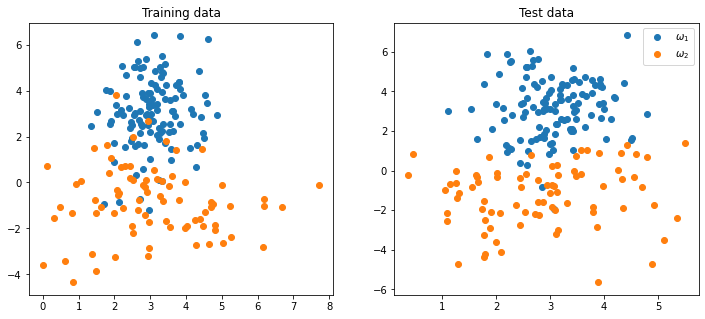

In [6]:
calculate(Y, X)

## Problem 2

#### Loading the datapoints for the rest of the tasks

In [7]:
X_2D3cl, X_2D4cl, X_2D4cl_ms, X_2D4cl_hs, X_3D3cl_ms, Y_2D3cl, Y_2D4cl, Y_2D4cl_ms, Y_2D4cl_hs, Y_3D3cl_ms = np.load(
    'data/lab4_2.p', allow_pickle=True)

### a)

,P(error),P(correct|w_1),P(correct|w_2),P(correct|w_3)
Maximum likelihood Reclassification,0.47,0.32,0.86,0.17
Maximum likelihood Testing,0.53,0.24,0.78,0.13
Parzen h1 = 0.1 Reclassification,0.05,0.96,0.92,1.00
Parzen h1 = 0.1 Testing,0.64,0.52,0.24,0.43
Parzen h1 = 0.5 Reclassification,0.49,0.48,0.64,0.33
Parzen h1 = 0.5 Testing,0.55,0.56,0.46,0.33
Nearest neighbours k = 1 Reclassification,0.05,1.00,0.90,1.00
Nearest neighbours k = 1 Testing,0.66,0.32,0.38,0.30
Nearest neighbours k = 5 Reclassification,0.31,0.56,0.84,0.53
Nearest neighbours k = 5 Testing,0.58,0.40,0.58,0.17


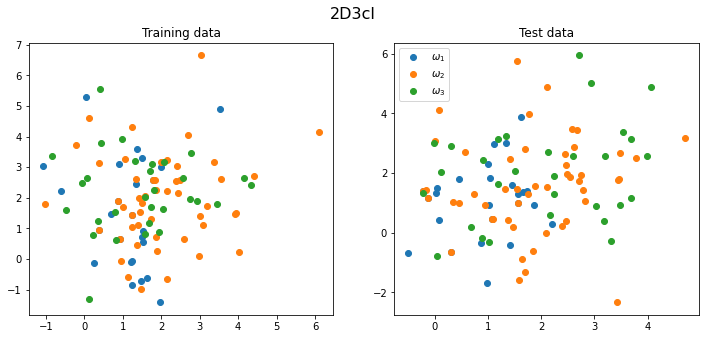

In [8]:
calculate(Y_2D3cl, X_2D3cl, '2D3cl')

### b)

,P(error),P(correct|w_1),P(correct|w_2),P(correct|w_3),P(correct|w_4)
Maximum likelihood Reclassification,0.48,0.52,0.56,0.44,0.56
Maximum likelihood Testing,0.63,0.28,0.52,0.28,0.40
Parzen h1 = 0.1 Reclassification,0.00,1.00,1.00,1.00,1.00
Parzen h1 = 0.1 Testing,0.69,0.40,0.40,0.12,0.32
Parzen h1 = 0.5 Reclassification,0.46,0.52,0.64,0.48,0.52
Parzen h1 = 0.5 Testing,0.62,0.24,0.52,0.36,0.40
Nearest neighbours k = 1 Reclassification,0.00,1.00,1.00,1.00,1.00
Nearest neighbours k = 1 Testing,0.69,0.32,0.48,0.12,0.32
Nearest neighbours k = 5 Reclassification,0.34,0.48,0.72,0.64,0.80
Nearest neighbours k = 5 Testing,0.61,0.28,0.60,0.28,0.40


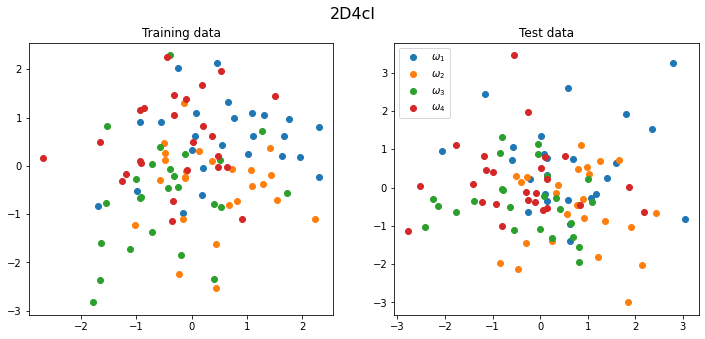

In [9]:
calculate(Y_2D4cl, X_2D4cl, '2D4cl')

### c)

,P(error),P(correct|w_1),P(correct|w_2),P(correct|w_3),P(correct|w_4)
Maximum likelihood Reclassification,0.29,0.72,0.72,0.68,0.72
Maximum likelihood Testing,0.29,0.64,0.64,0.76,0.80
Parzen h1 = 0.1 Reclassification,0.00,1.00,1.00,1.00,1.00
Parzen h1 = 0.1 Testing,0.43,0.64,0.48,0.48,0.68
Parzen h1 = 0.5 Reclassification,0.28,0.80,0.68,0.68,0.72
Parzen h1 = 0.5 Testing,0.28,0.76,0.64,0.72,0.76
Nearest neighbours k = 1 Reclassification,0.00,1.00,1.00,1.00,1.00
Nearest neighbours k = 1 Testing,0.42,0.60,0.48,0.52,0.72
Nearest neighbours k = 5 Reclassification,0.18,0.84,0.88,0.76,0.80
Nearest neighbours k = 5 Testing,0.33,0.72,0.60,0.64,0.72


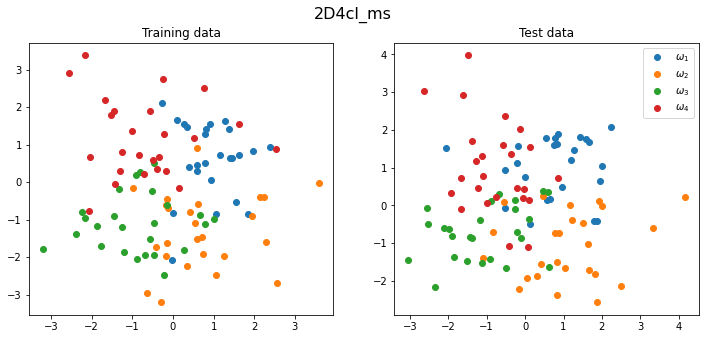

In [10]:
calculate(Y_2D4cl_ms, X_2D4cl_ms, '2D4cl_ms')

### d)

,P(error),P(correct|w_1),P(correct|w_2),P(correct|w_3),P(correct|w_4)
Maximum likelihood Reclassification,0.07,0.92,0.88,0.96,0.96
Maximum likelihood Testing,0.05,0.96,0.88,1.00,0.96
Parzen h1 = 0.1 Reclassification,0.00,1.00,1.00,1.00,1.00
Parzen h1 = 0.1 Testing,0.12,0.88,0.80,0.92,0.92
Parzen h1 = 0.5 Reclassification,0.05,0.96,0.92,0.96,0.96
Parzen h1 = 0.5 Testing,0.05,0.96,0.88,1.00,0.96
Nearest neighbours k = 1 Reclassification,0.00,1.00,1.00,1.00,1.00
Nearest neighbours k = 1 Testing,0.08,0.88,0.88,0.96,0.96
Nearest neighbours k = 5 Reclassification,0.03,1.00,0.96,0.96,0.96
Nearest neighbours k = 5 Testing,0.05,0.96,0.88,1.00,0.96


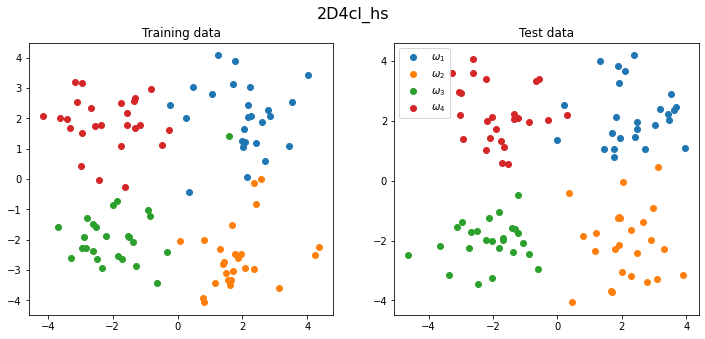

In [11]:
calculate(Y_2D4cl_hs, X_2D4cl_hs, '2D4cl_hs')

By looking at the dataframes created by subtask b), c) and d), we clearly see that the error rate drops as the separability increases.

### e)

,P(error),P(correct|w_1),P(correct|w_2),P(correct|w_3)
Maximum likelihood Reclassification,0.21,0.67,0.85,0.85
Maximum likelihood Testing,0.17,0.91,0.85,0.73
Parzen h1 = 0.1 Reclassification,0.00,1.00,1.00,1.00
Parzen h1 = 0.1 Testing,0.48,0.91,0.21,0.42
Parzen h1 = 0.5 Reclassification,0.17,0.76,0.82,0.91
Parzen h1 = 0.5 Testing,0.20,0.85,0.82,0.73
Nearest neighbours k = 1 Reclassification,0.00,1.00,1.00,1.00
Nearest neighbours k = 1 Testing,0.33,0.82,0.55,0.64
Nearest neighbours k = 5 Reclassification,0.10,0.88,0.91,0.91
Nearest neighbours k = 5 Testing,0.22,0.85,0.82,0.67


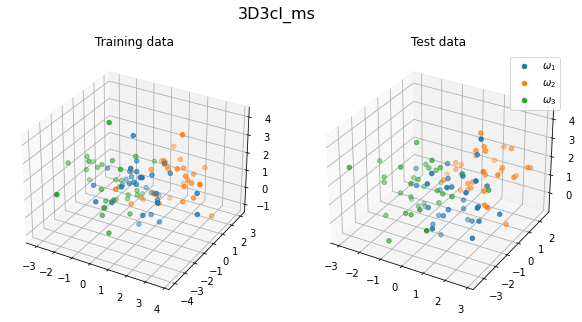

In [12]:
calculate(Y_3D3cl_ms, X_3D3cl_ms, '3D3cl_ms', plot3D=True)

## Code from `models.py` and `pdffuns.py`

`models.py`

In [13]:
import numpy as np


class MLClassifier:
    def __init__(self):
        self.classes = []
        self.prior = {}
        self.mu = {}
        self.sgm = {}

    def fit(self, x, y):
        class_labels = np.unique(y)
        for label in class_labels:
            class_idx = np.where(y == label)
            self.classes.append(label)
            self.prior[label] = np.size(class_idx) / np.size(y)
            self.mu[label] = np.mean(x[class_idx], axis=0)
            self.sgm[label] = np.cov(x[class_idx], rowvar=False)

    def predict(self, x):
        predictions = []
        for point in x:
            discrs = {}
            for classnum in self.classes:
                discrs[classnum] = self._discriminant(point, classnum)

            predictions.append(max(discrs, key=discrs.get))

        return np.array(predictions)

    def _discriminant(self, x, label):
        # Case 3 discriminant function
        x_mu = x - self.mu[label]
        sgminv = np.linalg.inv(self.sgm[label])
        sgmdet = np.linalg.det(self.sgm[label])

        p = -1/2 * np.linalg.multi_dot([x_mu.T, sgminv, x_mu]) - \
            1/2 * np.log(sgmdet) + np.log(self.prior[label])
        return p


class ParzenClassifer:
    def __init__(self, h1):
        self.h1 = h1
        self.classes = []
        self.points = {}

    def fit(self, x, y):
        class_labels = np.unique(y)
        for label in class_labels:
            class_idx = np.where(y == label)
            self.classes.append(label)
            self.points[label] = x[class_idx]

    def predict(self, x):
        predictions = []
        for point in x:
            discrs = {}
            for classnum in self.classes:
                discrs[classnum] = self._discriminant(point, classnum)

            predictions.append(max(discrs, key=discrs.get))

        return np.array(predictions)

    def _discriminant(self, x, label):
        # Normal parzen window
        dim = self.points[label].shape[-1]
        N = len(self.points[label])
        hn = self.h1 / np.sqrt(N)

        all_u = np.array([(x-x_i) / hn for x_i in self.points[label]])
        const = 1 / (N * hn**dim * (2*np.pi)**(dim/2) * 1**(dim/2))

        p = const * sum([np.exp(-1/2*np.dot(u, u)) for u in all_u])

        return p


class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.classes = []
        self.points = {}

    def fit(self, x, y):
        class_labels = np.unique(y)
        for label in class_labels:
            class_idx = np.where(y == label)
            self.classes.append(label)
            self.points[label] = x[class_idx]

    def predict(self, x):
        prediction = []

        for point in x:
            classdist = {}

            for c in self.classes:
                classdist[c] = sum(self._closest_k_euclidian(point, c))

            prediction.append(min(classdist, key=classdist.get))

        return np.array(prediction)

    def _closest_k_euclidian(self, x, c):
        return sorted([np.linalg.norm(p - x, ord=2) for p in self.points[c]])[:self.k]


`pdffuns.py`

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.color_palette('bright')
plt.rcParams['figure.figsize'] = [12, 5]


def separate_classes(x, y):
    x_train = np.vstack([_.T for _ in x])
    x_test = np.vstack([_.T for _ in y])

    y_train = np.array([i+1 for i, data in enumerate(x)
                        for _ in range(data.shape[1])])
    y_test = np.array([i+1 for i, data in enumerate(y)
                       for _ in range(data.shape[1])])

    return x_train, x_test, y_train, y_test


def plot_data_2D(train, test, title):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(title, fontsize=16)
    for i, dataset in enumerate([train, test]):
        ax[i].set(title='Training data' if i == 0 else 'Test data')
        for j, data in enumerate(dataset):
            ax[i].scatter(data[0], data[1], label=fr'$\omega_{j+1}$')
    plt.legend()


def plot_data_3D(train, test, title):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    fig.suptitle(title, fontsize=16)
    for i, dataset in enumerate([train, test]):
        ax = fig.add_subplot(1, 2, i + 1, projection='3d')
        ax.set(title='Training data' if i == 0 else 'Test data')
        for j, data in enumerate(dataset):
            ax.scatter(data[0], data[1], data[2], label=fr'$\omega_{j+1}$')
    plt.legend()


def confusion_matrix(predicted_labels, true_labels, normalize=True):
    matshape = len(np.unique(true_labels))
    cm = np.zeros((matshape, matshape))

    for i in range(len(predicted_labels)):
        cm[predicted_labels[i]-1, true_labels[i]-1] += 1

    return cm / cm.sum(axis=0) if normalize else cm
